In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [2]:
rmf_df = pd.read_csv('rfm2.csv')
rmf_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,1,344,1,16.29,1,1,2,112
1,2,196,2,22.77,2,3,2,232
2,3,364,1,10.92,1,1,2,112
3,4,53,2,33.29,3,3,3,333
4,5,180,5,78.82,2,4,4,244
...,...,...,...,...,...,...,...,...
22620,22621,22,1,9.69,4,1,1,411
22621,22622,16,1,6.07,4,1,1,411
22622,22623,11,1,128.01,4,1,4,414
22623,22624,30,1,19.60,4,1,2,412


In [3]:
df = pd.read_csv('merged_df.csv')
df

,id,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
1,639,2021-01-04,2547,332,Q4N,MM3E0,1.0,12.69,M,43,Greece
2,7800,2021-01-25,2547,3743,X52,885U7,1.0,4.95,M,43,Greece
3,7801,2021-01-25,2547,3743,29A,A59HR,3.0,6.24,M,43,Greece
4,17633,2021-02-22,2547,8477,L9F,7W8WS,1.0,11.75,M,43,Greece
...,...,...,...,...,...,...,...,...,...,...,...
131701,131653,2021-07-04,5751,32874,LSD,NSGRM,1.0,11.02,F,34,Germany
131702,131654,2021-07-04,5751,32874,0H2,9Q5PZ,1.0,7.85,F,34,Germany
131703,131655,2021-07-04,5751,32874,D6J,52BYA,1.0,40.72,F,34,Germany
131704,131666,2021-07-04,10765,32881,Z4O,6IISH,1.0,1.19,F,43,Greece


In [4]:
# Merging the two DataFrames on 'customer_id'
merged_df = pd.merge(rmf_df, df, on='customer_id', how='inner')

In [5]:
merged_df = merged_df.drop(columns='id', axis=1)
merged_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,date,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country
0,1,344,1,16.29,1,1,2,112,2021-01-22,3442,0H2,6OUVC,1.0,10.50,F,40,UK
1,1,344,1,16.29,1,1,2,112,2021-01-22,3442,N8U,CEBU8,1.0,5.79,F,40,UK
2,2,196,2,22.77,2,3,2,232,2021-03-24,14177,TVL,2SLS0,1.0,7.77,M,33,Germany
3,2,196,2,22.77,2,3,2,232,2021-06-19,30451,F9B,GZ6VU,1.0,15.00,M,33,Germany
4,3,364,1,10.92,1,1,2,112,2021-01-02,90,LPF,Y1M2E,2.0,8.16,F,40,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,22625,1,4,83.62,4,4,4,444,2021-12-14,61419,N8U,L61A1,1.0,2.33,M,44,Greece
131702,22625,1,4,83.62,4,4,4,444,2021-12-14,61419,N8U,61L0Q,2.0,5.46,M,44,Greece
131703,22625,1,4,83.62,4,4,4,444,2021-12-14,61419,QLB,M3SY1,1.0,6.25,M,44,Greece
131704,22625,1,4,83.62,4,4,4,444,2021-12-19,62553,1L6,Y2U6K,1.0,8.97,M,44,Greece


In [6]:
merged_df.dtypes

customer_id         int64
Recency             int64
Frequency           int64
Monetary          float64
R_Score             int64
F_Score             int64
M_Score             int64
RFM_Segment         int64
date               object
transaction_id      int64
sku_category       object
sku                object
quantity          float64
sales_amount      float64
gender             object
age                 int64
country            object
dtype: object

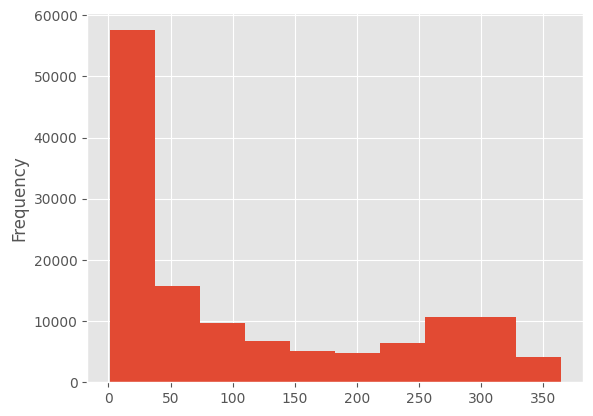

In [7]:
merged_df['Recency'].plot(kind='hist', bins=10)
plt.show()

In [8]:
merged_df.to_csv('new_merged_df.csv', index=True)

In [8]:
merged_df['is_active'] = (merged_df['Recency'] <= 120).astype(int)
merged_df.head(5)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,date,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country,is_active
0,1,344,1,16.29,1,1,2,112,2021-01-22,3442,0H2,6OUVC,1.0,10.50,F,40,UK,0
1,1,344,1,16.29,1,1,2,112,2021-01-22,3442,N8U,CEBU8,1.0,5.79,F,40,UK,0
2,2,196,2,22.77,2,3,2,232,2021-03-24,14177,TVL,2SLS0,1.0,7.77,M,33,Germany,0
3,2,196,2,22.77,2,3,2,232,2021-06-19,30451,F9B,GZ6VU,1.0,15.00,M,33,Germany,0
4,3,364,1,10.92,1,1,2,112,2021-01-02,90,LPF,Y1M2E,2.0,8.16,F,40,UK,0


In [10]:
merged_df['is_active'].value_counts()

is_active
1    85081
0    46625
Name: count, dtype: int64

In [11]:
merged_df.dtypes

customer_id         int64
Recency             int64
Frequency           int64
Monetary          float64
R_Score             int64
F_Score             int64
M_Score             int64
RFM_Segment         int64
date               object
transaction_id      int64
sku_category       object
sku                object
quantity          float64
sales_amount      float64
gender             object
age                 int64
country            object
is_active           int64
dtype: object

In [12]:
merged_df.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Segment', 'date', 'transaction_id', 'sku_category',
       'sku', 'quantity', 'sales_amount', 'gender', 'age', 'country',
       'is_active'],
      dtype='object')

In [13]:
categorical_columns = [
    'country',
    'gender',
]

In [14]:
numerical_columns = [
    'Recency',
    'Frequency',
    'Monetary',
    'R_Score',
    'F_Score',
    'M_Score',
    'quantity', 
    'sales_amount',
    'age',
    'is_active',
    'RFM_Segment'
]

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns
cat_features = merged_df[categorical_columns]

# Applying one-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop first to avoid multicollinearity
encoded_cat_features = one_hot_encoder.fit_transform(cat_features)

# Converting the encoded features into a DataFrame
encoded_cat_df = pd.DataFrame(encoded_cat_features, 
                              columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Combining the encoded features with the rest of your data
merged_df = merged_df.drop(categorical_columns, axis=1)
merged_df = pd.concat([merged_df, encoded_cat_df], axis=1)

/home/joao/miniconda3/envs/capstone/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
merged_df.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Segment', 'date', 'transaction_id', 'sku_category',
       'sku', 'quantity', 'sales_amount', 'age', 'is_active',
       'country_Germany', 'country_Greece', 'country_Italy',
       'country_Netherlands', 'country_Spain', 'country_UK', 'gender_M'],
      dtype='object')

In [17]:
feature_names = ['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
                 'quantity', 'sales_amount', 'age', 'country_Germany', 'country_Greece', 
                 'country_Italy', 'country_Netherlands', 'country_Spain', 'country_UK', 'gender_M']
features = merged_df[feature_names]
target = merged_df['is_active']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
(train_X, test_X, train_y, test_y) = train_test_split(
    features, target, train_size=0.7, random_state=20)

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

DecisionTreeClassifier()

In [21]:
dtc.get_depth()

1

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(features, target)

In [ ]:
print(dtc.feature_importances_)

In [ ]:
dtc.get_depth()

In [ ]:
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test = dtc.predict(test_X)
score_test = dtc.predict_proba(test_X)

# let's take a look at the generated scores
set(score_test[:,1])


In [ ]:
print(test_X.shape)
print(label_pred_test.shape)
label_pred_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(test_y, label_pred_test)
print(cm_test)

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(test_y, score_test)